In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import RepeatedKFold
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('C:\\Users\\Preetham G\\Downloads\\codesdata\\xymean.csv')

In [9]:
n_est = [100, 200, 300, 400, 500, 600, 700]
kf = RepeatedKFold(n_repeats=1, n_splits=10)
notnull = data[data['is_goal'].notnull()]

In [32]:
model = RandomForestClassifier()
n_estimators = range(550,650, 20)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(notnull.drop(columns=['is_goal']), notnull['is_goal'])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot

Best: -0.651475 using {'n_estimators': 570}
-0.652178 (0.002122) with: {'n_estimators': 550}
-0.651475 (0.002245) with: {'n_estimators': 570}
-0.651826 (0.002248) with: {'n_estimators': 590}
-0.651883 (0.001880) with: {'n_estimators': 610}
-0.651701 (0.002069) with: {'n_estimators': 630}


In [35]:
model = RandomForestClassifier(n_estimators=570)
max_depth = range(18, 30, 2)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(notnull.drop(columns=['is_goal']), notnull['is_goal'])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot

Best: -0.640587 using {'max_depth': 18}
-0.640587 (0.002215) with: {'max_depth': 18}
-0.640625 (0.002083) with: {'max_depth': 20}
-0.640864 (0.002295) with: {'max_depth': 22}
-0.641242 (0.001943) with: {'max_depth': 24}
-0.642405 (0.002439) with: {'max_depth': 26}
-0.643045 (0.002783) with: {'max_depth': 28}


In [40]:
model = RandomForestClassifier()
n_estimators = range(550, 600, 20)
max_depth = [17, 18, 19]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(notnull.drop(columns=['is_goal']), notnull['is_goal'])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot

Best: -0.640415 using {'max_depth': 19, 'n_estimators': 550}
-0.640741 (0.001804) with: {'max_depth': 17, 'n_estimators': 550}
-0.640919 (0.001912) with: {'max_depth': 17, 'n_estimators': 570}
-0.640439 (0.001899) with: {'max_depth': 17, 'n_estimators': 590}
-0.640567 (0.002058) with: {'max_depth': 18, 'n_estimators': 550}
-0.640478 (0.001857) with: {'max_depth': 18, 'n_estimators': 570}
-0.640608 (0.002036) with: {'max_depth': 18, 'n_estimators': 590}
-0.640415 (0.002126) with: {'max_depth': 19, 'n_estimators': 550}
-0.640510 (0.001954) with: {'max_depth': 19, 'n_estimators': 570}
-0.640563 (0.001932) with: {'max_depth': 19, 'n_estimators': 590}


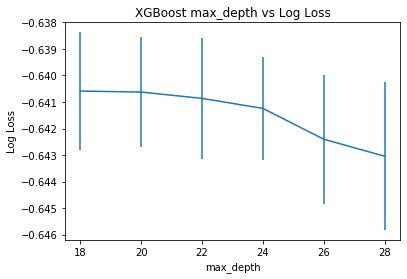

In [38]:
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('max_depth.png')


In [10]:
rfc = RandomForestClassifier(n_estimators=550, max_depth=19, min_samples_split=6, min_samples_leaf=2)
test = data[data['is_goal'].isnull()]
train = notnull

In [11]:
rfc.fit(train.drop(columns=['is_goal']), train['is_goal'])
pred1 = rfc.predict_proba(test.drop(columns=['is_goal']))

In [14]:
test['is_goal']=pred1
submission=test[['shot_id_number','is_goal']]
submission.to_csv('shriprasad_rajendran_10141997_perdiction_5.csv')

C:\Users\Preetham G\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
submission

,shot_id_number,is_goal
0,1,0.607616
7,8,0.580318
16,17,0.484642
19,20,0.487403
21,22,0.582614
32,33,0.571319
33,34,0.483459
34,35,0.483827
35,36,0.500844
36,37,0.419704


In [46]:
model = RandomForestClassifier(n_estimators=570, max_depth=19, min_samples_split=6, min_samples_leaf=2)
min_samples_split = range(2, 10, 2)
param_grid = dict(min_samples_split=min_samples_split)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(notnull.drop(columns=['is_goal']), notnull['is_goal'])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot

Best: -0.640372 using {'min_samples_split': 6}
-0.640552 (0.002012) with: {'min_samples_split': 2}
-0.640412 (0.002194) with: {'min_samples_split': 4}
-0.640372 (0.001931) with: {'min_samples_split': 6}
-0.640558 (0.002144) with: {'min_samples_split': 8}


In [5]:
model = RandomForestClassifier(n_estimators=570, max_depth=19, min_samples_split=6)
min_samples_leaf = range(2, 10, 2)
param_grid = dict(min_samples_leaf=min_samples_leaf)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(notnull.drop(columns=['is_goal']), notnull['is_goal'])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot

KeyboardInterrupt: 

In [17]:
fi = pd.DataFrame(rfc.feature_importances_, index=notnull.drop(columns=['is_goal']).columns, columns=['importance']).sort_values('importance', ascending=False)

In [18]:
fi

,importance
distance_of_shot,0.077529
location_y,0.070586
Unnamed: 0,0.060400
shot_id_number,0.059508
location_x,0.058542
remaining_sec,0.057251
match_id,0.054737
remaining_min,0.039889
shot_basics_Goal Area,0.033372
type_of_shot_shot - 39,0.029765
